In [1]:
# Librairies et fonctions

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('donnees_simulees.csv')
df.head()

UFR Filière      Sexe Niveau Fréquence d'utilisation  \
0  SEG      HA   Feminin     L3           Occasionnelle   
1   ST     SVT   Feminin     L2             Quotidienne   
2  LSH      HA  Masculin     L2             Quotidienne   
3  SEG    MPCI  Masculin     L2           Occasionnelle   
4  SEG    MPCI  Masculin     L2           Occasionnelle   

   Durée par session (min) Impact sur la motivation  Moyenne actuelle  \
0                      179                 Augmenté          7.131486   
1                      145                  Diminué          3.547731   
2                       10                 Augmenté         15.392803   
3                      245                 Augmenté         11.010319   
4                       36                 Augmenté          9.919945   

   Moyenne avant l'accès  Moyenne après l'accès  Temps d'étude/semaine (h)  \
0              10.186278              16.147228                          7   
1              12.618552              16.408861                         11   
2               4.821351              12.657355                          8   
3               5.627384               7.837539                         21   
4               5.524963               4.105976                         30   

  Usage de la connexion  Statut de réussite  
0        Réseaux sociax                   1  
1        Réseaux sociax                   1  
2                Autres                   1  
3        Réseaux sociax                   1  
4                Autres                   0

## Analyse de la forme

In [3]:
# Nombre de ligne et colone
df.shape

(2000, 13)

In [4]:
# Type de variable
df.dtypes.value_counts()

object     7
int64      3
float64    3
Name: count, dtype: int64

<Axes: >

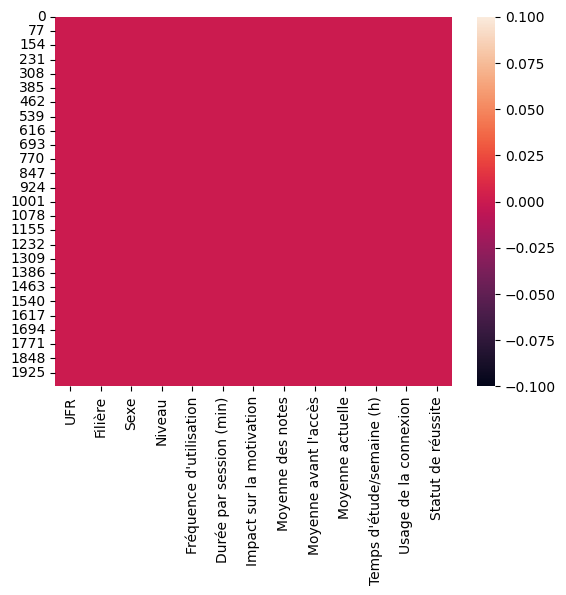

In [5]:
# Les valeurs manquante
sns.heatmap(df.isna())

In [4]:
# Examen de la variable cible
df['Statut de réussite'].value_counts(normalize=True)

Statut de réussite
1    0.506
0    0.494
Name: proportion, dtype: float64

## Analyse du fond

C:\Users\Ramzy Mr 17\AppData\Local\Temp\ipykernel_8244\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ramzy Mr 17\AppData\Local\Temp\ipykernel_8244\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ramzy Mr 17\AppData\Local\Temp\ip

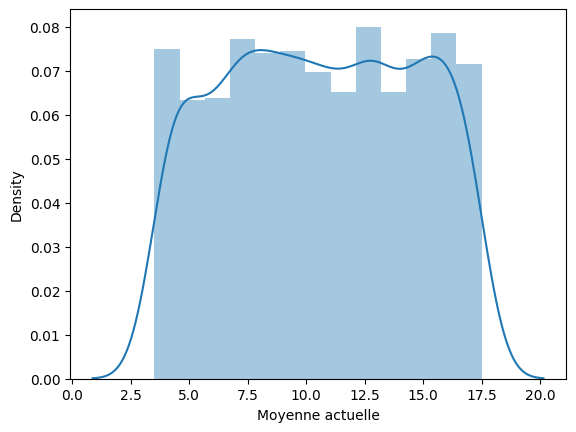

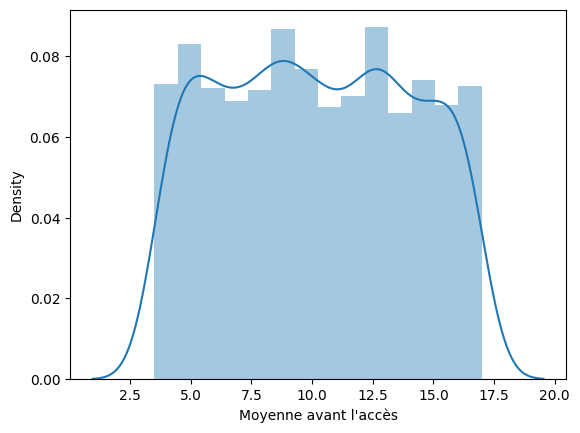

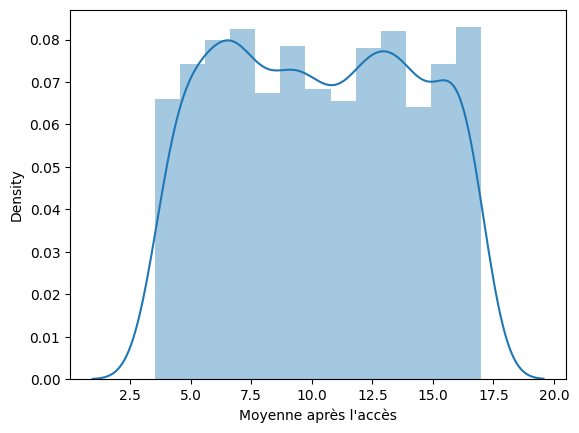

In [5]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [6]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

UFR----------------------------------------------- ['SEG' 'ST' 'LSH']
Filière------------------------------------------- ['HA' 'SVT' 'MPCI' 'Geographie' 'LM' 'SEG' 'Philo']
Sexe---------------------------------------------- ['Feminin' 'Masculin']
Niveau-------------------------------------------- ['L3' 'L2' 'L1']
Fréquence d'utilisation--------------------------- ['Occasionnelle' 'Quotidienne' 'Hebdomadaire']
Impact sur la motivation-------------------------- ['Augmenté' 'Diminué' 'Inchangé']
Usage de la connexion----------------------------- ['Réseaux sociax' 'Autres' 'Recherche']


## Relation Target / Variables

### Relation Target / UFR

<Axes: xlabel='UFR', ylabel='count'>

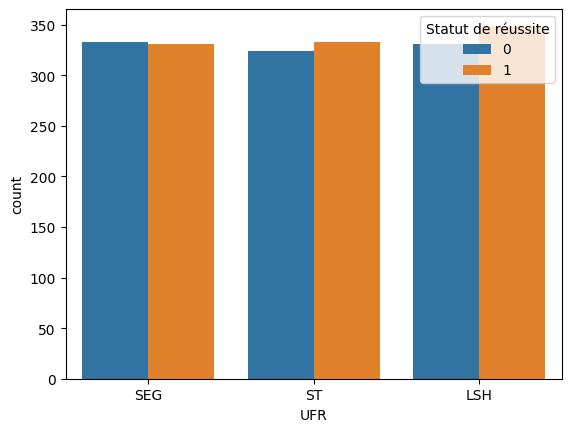

In [7]:
sns.countplot(x='UFR', hue='Statut de réussite', data=df)


<Axes: xlabel='UFR', ylabel='Statut de réussite'>

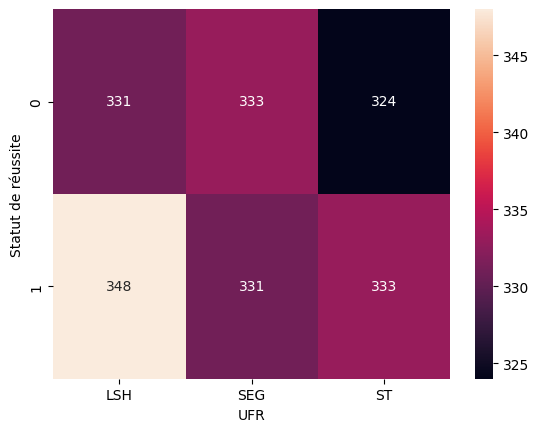

In [8]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['UFR']), annot=True, fmt='d')

### Relation Target / Filière

<Axes: xlabel='Filière', ylabel='count'>

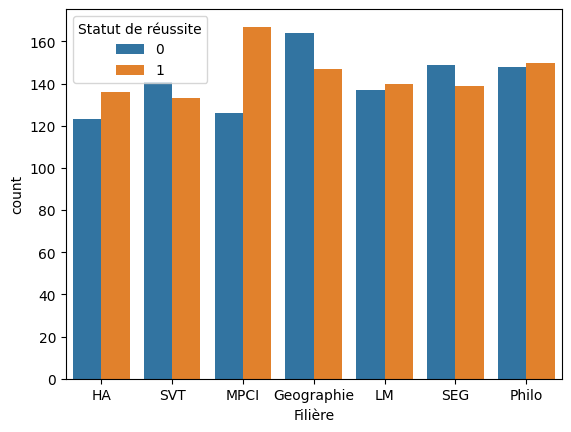

In [9]:
sns.countplot(x='Filière', hue='Statut de réussite', data=df)

### Relation Target / Niveau

<Axes: xlabel='Niveau', ylabel='count'>

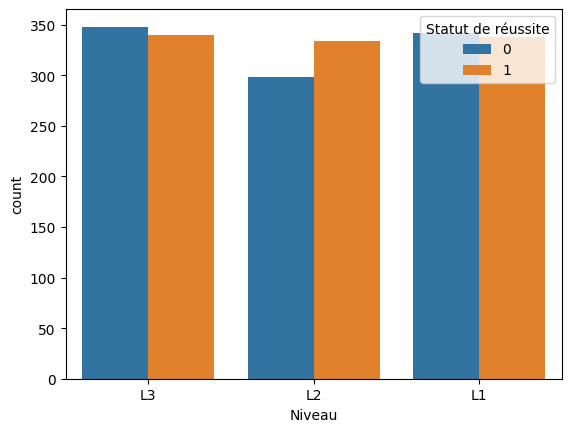

In [12]:
sns.countplot(x='Niveau', hue='Statut de réussite', data=df)

<Axes: xlabel='Niveau', ylabel='Statut de réussite'>

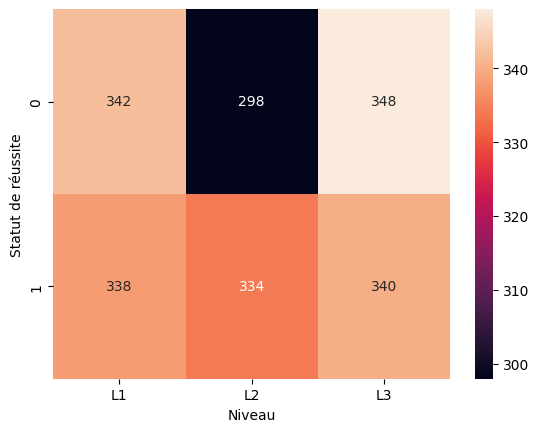

In [13]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Niveau']), annot=True, fmt='d')

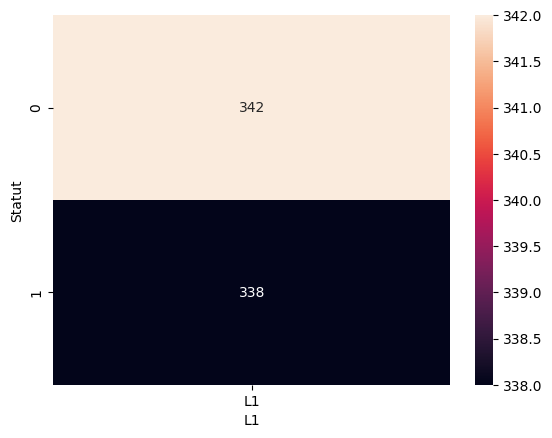

In [14]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L1')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L1')
plt.ylabel('Statut')
plt.show()

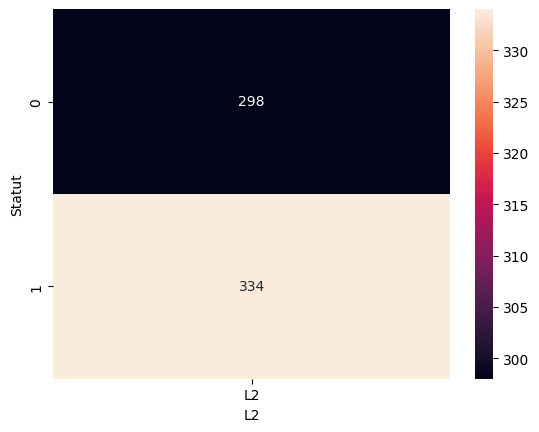

In [15]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L2')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L2')
plt.ylabel('Statut')
plt.show()

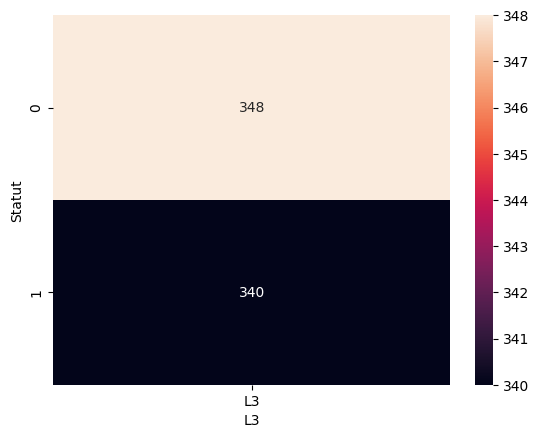

In [16]:
# Filtrer le DataFrame pour inclure uniquement les données de l'année 2011 dans la colonne 'Annee_BAC'
filtered_df = df[df['Niveau'].astype(str).str.startswith('L3')]

# Créer la heatmap basée sur la table de contingence
plt.figure()
sns.heatmap(pd.crosstab(filtered_df['Statut de réussite'], filtered_df['Niveau']), annot=True, fmt='d')
plt.xlabel('L3')
plt.ylabel('Statut')
plt.show()

### Relation Target / Fréquence d'utilisation

<Axes: xlabel="Fréquence d'utilisation", ylabel='count'>

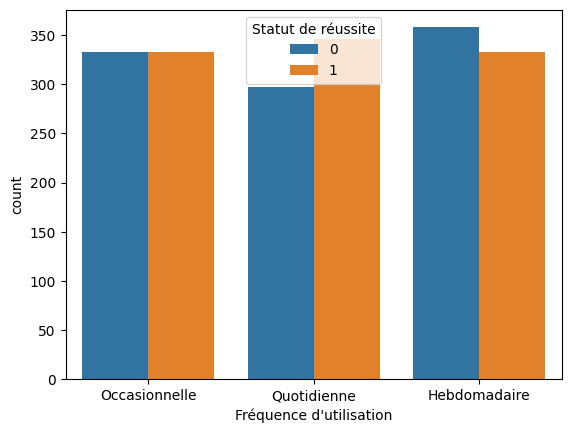

In [17]:
sns.countplot(x="Fréquence d'utilisation", hue='Statut de réussite', data=df)

<Axes: xlabel="Fréquence d'utilisation", ylabel='Statut de réussite'>

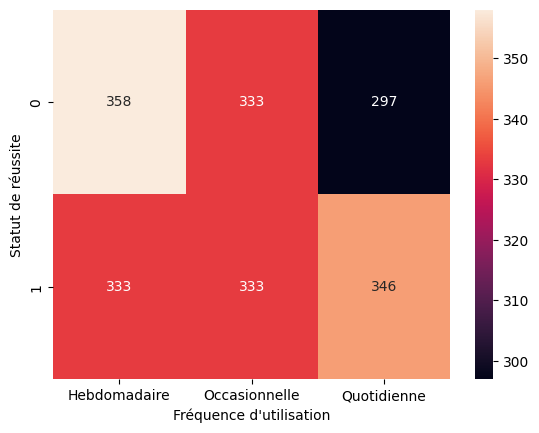

In [18]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df["Fréquence d'utilisation"]), annot=True, fmt='d')

### Relation Target / Motivation

<Axes: xlabel='Impact sur la motivation', ylabel='count'>

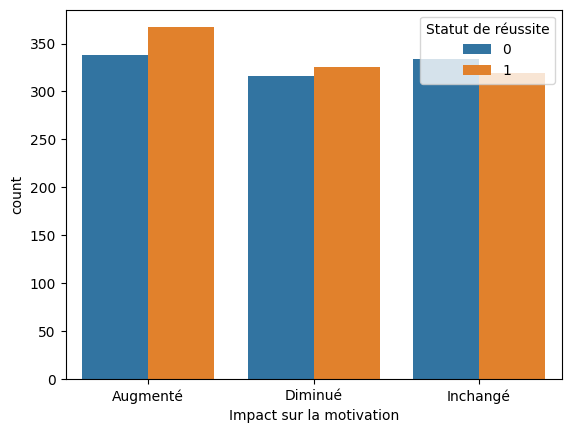

In [19]:
sns.countplot(x='Impact sur la motivation', hue='Statut de réussite', data=df)

### Relation Target / Usage

<Axes: xlabel='Usage de la connexion', ylabel='count'>

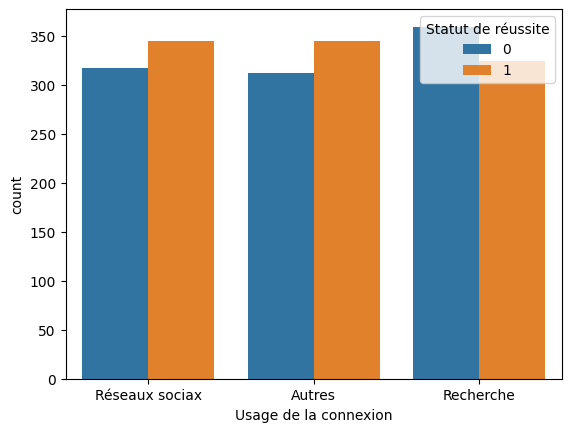

In [20]:
sns.countplot(x='Usage de la connexion', hue='Statut de réussite', data=df)

<Axes: xlabel='Usage de la connexion', ylabel='Statut de réussite'>

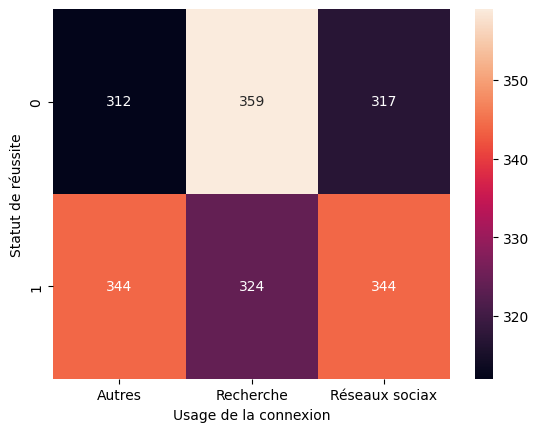

In [21]:

plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Usage de la connexion']), annot=True, fmt='d')

### Relation Target / Sexe

<Axes: xlabel='Sexe', ylabel='Statut de réussite'>

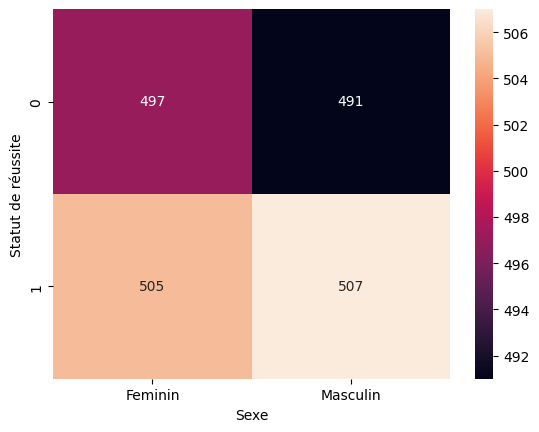

In [22]:
plt.figure()
sns.heatmap(pd.crosstab(df['Statut de réussite'], df['Sexe']), annot=True, fmt='d')

## Corrélation avec la variable cible

In [23]:
# Sélectionner uniquement les colonnes numériques et la colonne 'Mle' pour le calcul de la corrélation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la corrélation
correlation = numeric_df.corr()['Statut de réussite'].sort_values()

# Afficher la corrélation
print(correlation)


Temps d'étude/semaine (h)   -0.048239
Moyenne avant l'accès       -0.036181
Durée par session (min)     -0.002027
Moyenne actuelle             0.000269
Moyenne des notes            0.006884
Statut de réussite           1.000000
Name: Statut de réussite, dtype: float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   UFR                        2000 non-null   object 
 1   Filière                    2000 non-null   object 
 2   Sexe                       2000 non-null   object 
 3   Niveau                     2000 non-null   object 
 4   Fréquence d'utilisation    2000 non-null   object 
 5   Durée par session (min)    2000 non-null   int64  
 6   Impact sur la motivation   2000 non-null   object 
 7   Moyenne actuelle           2000 non-null   float64
 8   Moyenne avant l'accès      2000 non-null   float64
 9   Moyenne après l'accès      2000 non-null   float64
 10  Temps d'étude/semaine (h)  2000 non-null   int64  
 11  Usage de la connexion      2000 non-null   object 
 12  Statut de réussite         2000 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage:

## Relation Variable / Variable

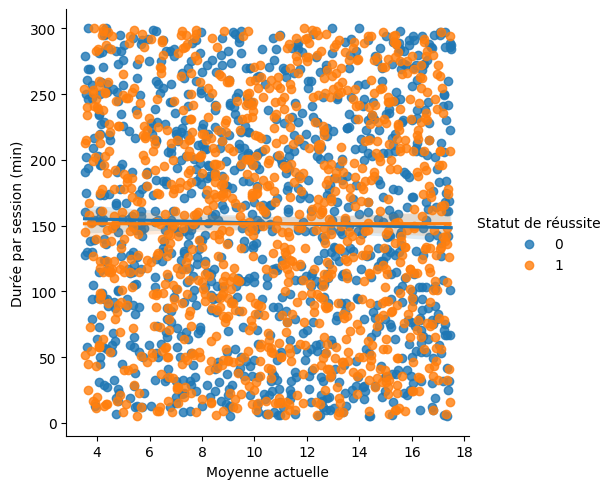

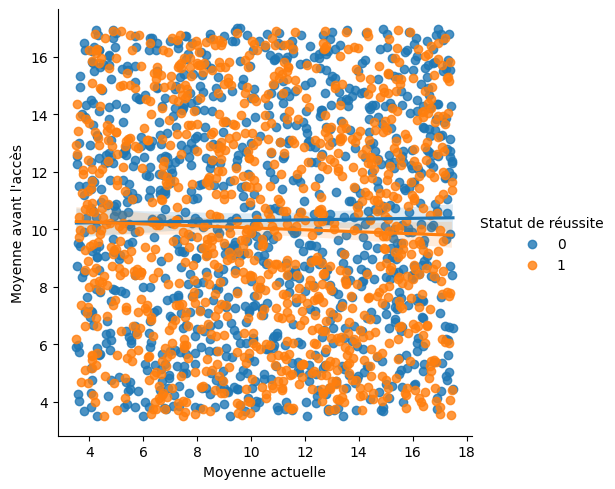

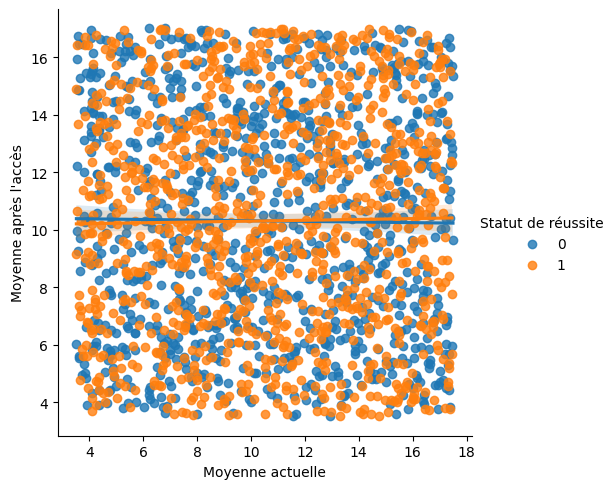

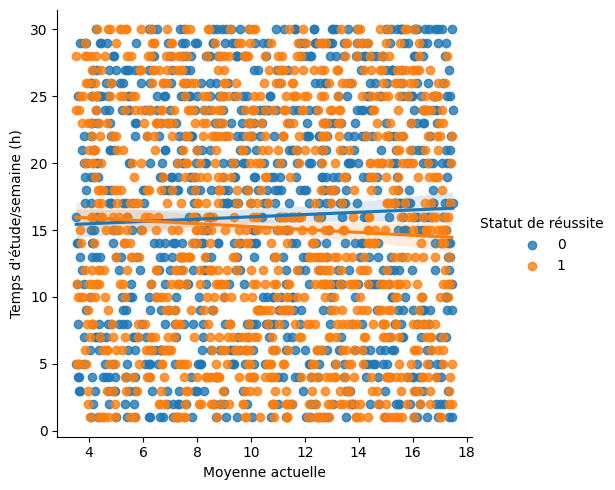

In [11]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', 'Moyenne avant l\'accès', "Moyenne après l'accès", "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x='Moyenne actuelle', y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


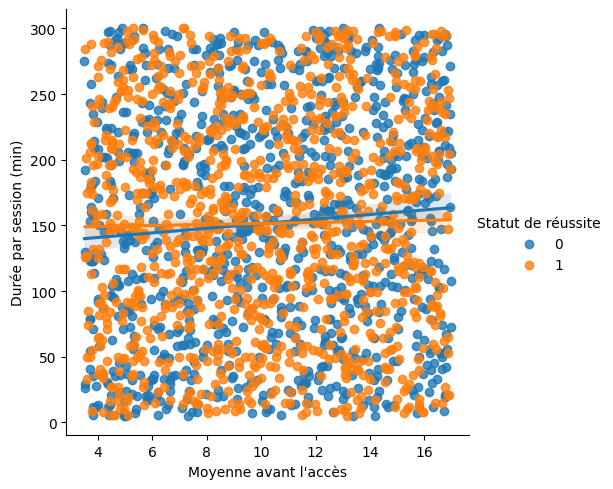

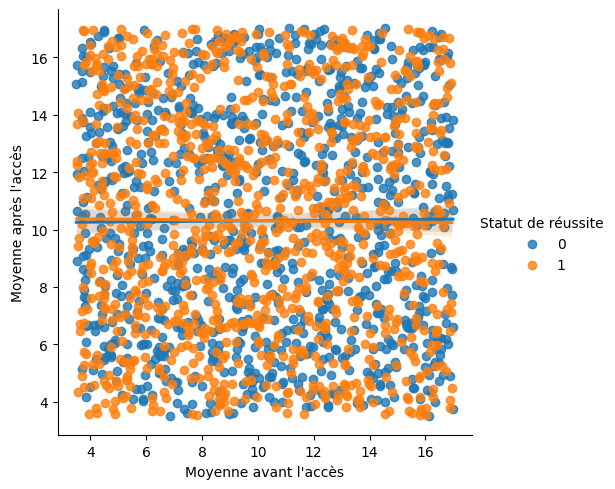

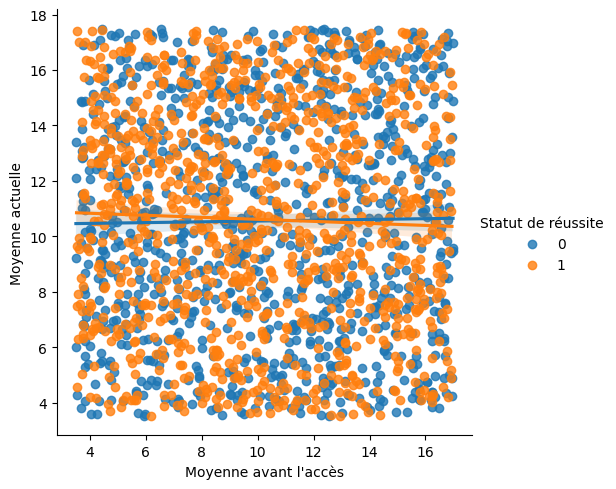

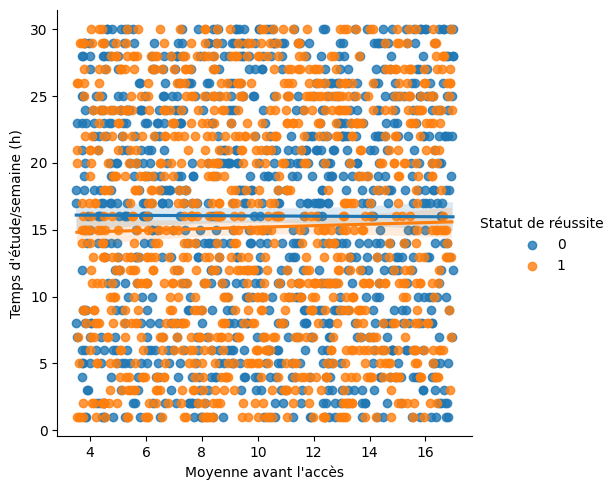

In [12]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', "Moyenne après l'accès", 'Moyenne actuelle', "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x="Moyenne avant l'accès", y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


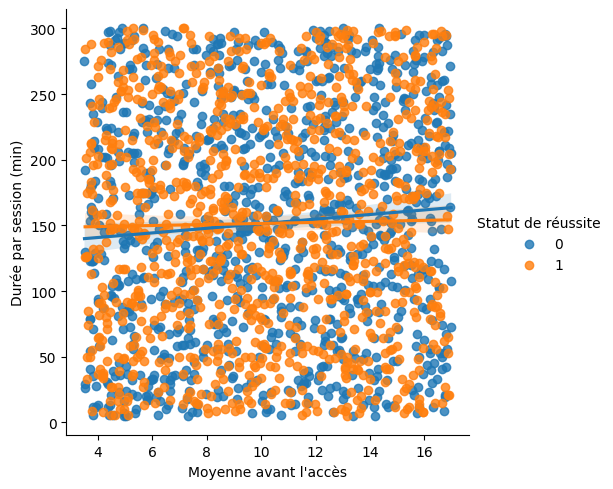

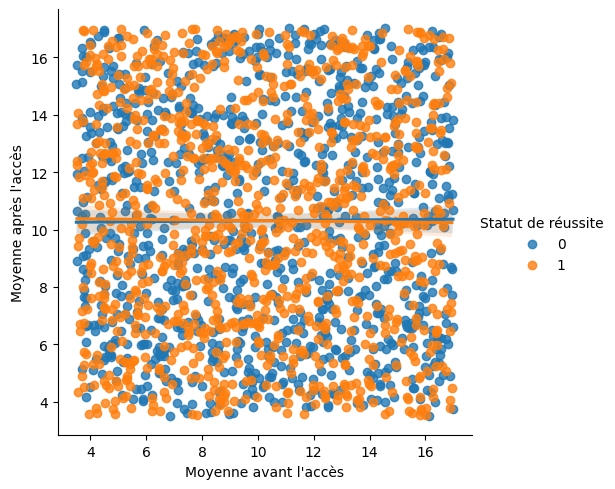

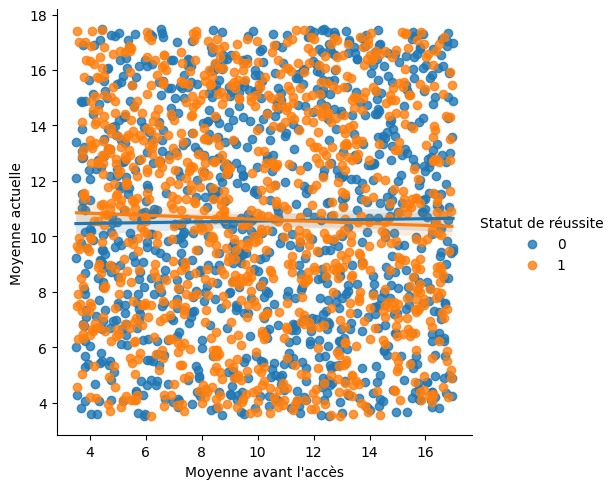

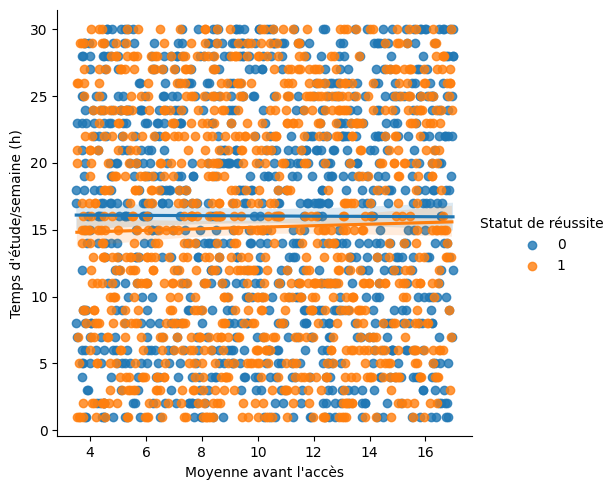

In [13]:
# Liste des colonnes à tracer
modules1 = ['Durée par session (min)', "Moyenne après l'accès", 'Moyenne actuelle', "Temps d'étude/semaine (h)"]

# Tracer un lmplot pour chaque colonne
for module in modules1:
    if df[module].dtype == 'object':
        try:
            df[module] = df[module].astype(float)
        except ValueError:
            print(f"La colonne {module} contient des valeurs non numériques.")
            continue
    sns.lmplot(x="Moyenne avant l'accès", y=module, hue='Statut de réussite', data=df)
    plt.show()  # Afficher le lmplot


In [14]:
# Sélectionner uniquement les colonnes numériques et la colonne 'Mle' pour le calcul de la corrélation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculer la corrélation
correlation = numeric_df.corr()['Statut de réussite'].sort_values()

# Afficher la corrélation
print(correlation)

Temps d'étude/semaine (h)   -0.048239
Moyenne avant l'accès       -0.036181
Durée par session (min)     -0.002027
Moyenne après l'accès        0.000269
Moyenne actuelle             0.006884
Statut de réussite           1.000000
Name: Statut de réussite, dtype: float64


## Encodage - Nettoyage - TrainTest

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df.head()

UFR Filière      Sexe Niveau Fréquence d'utilisation  \
0  SEG      HA   Feminin     L3           Occasionnelle   
1   ST     SVT   Feminin     L2             Quotidienne   
2  LSH      HA  Masculin     L2             Quotidienne   
3  SEG    MPCI  Masculin     L2           Occasionnelle   
4  SEG    MPCI  Masculin     L2           Occasionnelle   

   Durée par session (min) Impact sur la motivation  Moyenne actuelle  \
0                      179                 Augmenté          7.131486   
1                      145                  Diminué          3.547731   
2                       10                 Augmenté         15.392803   
3                      245                 Augmenté         11.010319   
4                       36                 Augmenté          9.919945   

   Moyenne avant l'accès  Moyenne après l'accès  Temps d'étude/semaine (h)  \
0              10.186278              16.147228                          7   
1              12.618552              16.408861                         11   
2               4.821351              12.657355                          8   
3               5.627384               7.837539                         21   
4               5.524963               4.105976                         30   

  Usage de la connexion  Statut de réussite  
0        Réseaux sociax                   1  
1        Réseaux sociax                   1  
2                Autres                   1  
3        Réseaux sociax                   1  
4                Autres                   0

In [18]:
from sklearn.preprocessing import LabelEncoder

# Instanciation d'un encodeur
label_encoder = LabelEncoder()

# Sélection des colonnes à encoder
categorical_columns = ["UFR", "Filière", "Sexe", "Niveau", "Fréquence d'utilisation", "Impact sur la motivation", "Usage de la connexion"]

# Application de l'encodage sur chaque colonne catégorielle
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [19]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [20]:
trainset['Statut de réussite'].value_counts()

Statut de réussite
1    820
0    780
Name: count, dtype: int64

In [21]:
testset['Statut de réussite'].value_counts()

Statut de réussite
0    208
1    192
Name: count, dtype: int64

In [36]:
def preprocessing(df):
    
    X = df.drop('Statut de réussite', axis=1)
    y = df['Statut de réussite']
    
    print(y.value_counts())
    
    return X, y

In [37]:
X_train, y_train = preprocessing(trainset)

Statut de réussite
1    820
0    780
Name: count, dtype: int64


In [38]:
X_train.head()

UFR  Filière  Sexe  Niveau  Fréquence d'utilisation  \
582     0        5     1       1                        1   
159     1        5     0       0                        0   
1827    1        0     1       1                        0   
318     0        1     0       1                        0   
708     1        4     1       2                        0   

      Durée par session (min)  Impact sur la motivation  Moyenne des notes  \
582                       121                         1           8.811177   
159                       236                         0          17.201576   
1827                      180                         2          14.047140   
318                       242                         1           9.073883   
708                       102                         1           7.008042   

      Moyenne avant l'accès  Moyenne actuelle  Temps d'étude/semaine (h)  \
582               15.819895         16.883697                          4   
159               16.664340         15.944203                         15   
1827              15.286369         15.520994                         12   
318                5.886761          4.043069                         17   
708               16.543505          5.834745                         12   

      Usage de la connexion  
582                       2  
159                       2  
1827                      0  
318                       1  
708                       0

In [39]:
X_test, y_test = preprocessing(testset)

Statut de réussite
0    208
1    192
Name: count, dtype: int64


# Modélisation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import learning_curve


In [41]:
model_1 = RandomForestClassifier(random_state=0)
model_2 = AdaBoostClassifier(random_state=0)

## Procédure d'évaluation

In [42]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='Score d\'entraînement')
    plt.plot(N, val_score.mean(axis=1), label='Score de validation')
    plt.legend()
    plt.xlabel('Nombre d\'étudiants')
    plt.ylabel('Score du modèle')

[[ 96 112]
 [ 83 109]]
              precision    recall  f1-score   support

           0       0.54      0.46      0.50       208
           1       0.49      0.57      0.53       192

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.52      0.51      0.51       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[ 94 114]
 [ 72 120]]
              precision    recall  f1-score   support

           0       0.57      0.45      0.50       208
           1       0.51      0.62      0.56       192

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.53       400
weighted avg       0.54      0.54      0.53       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

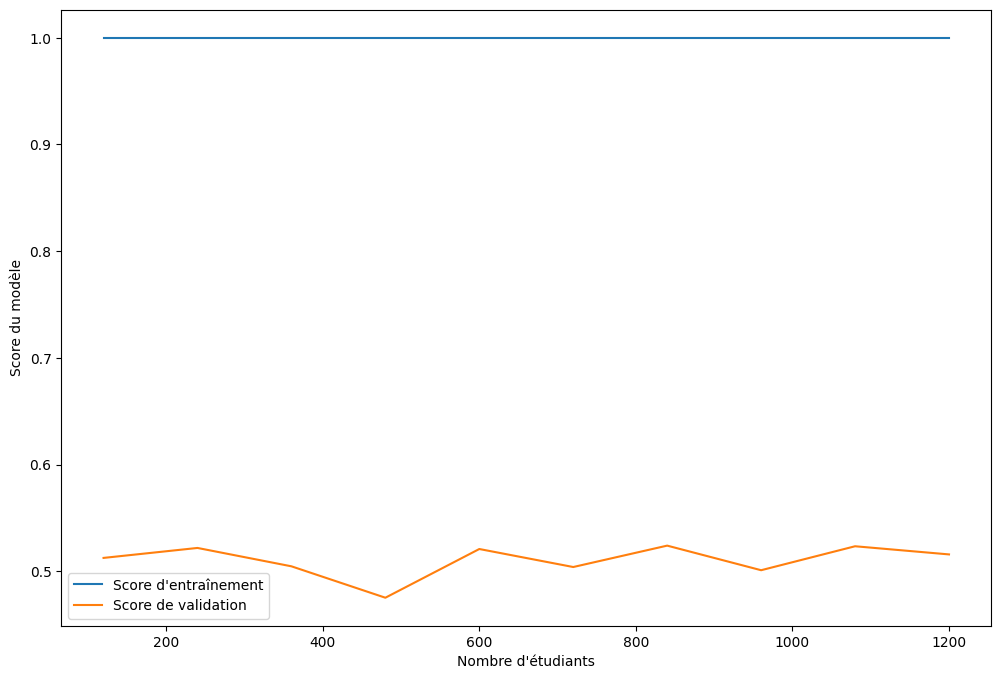

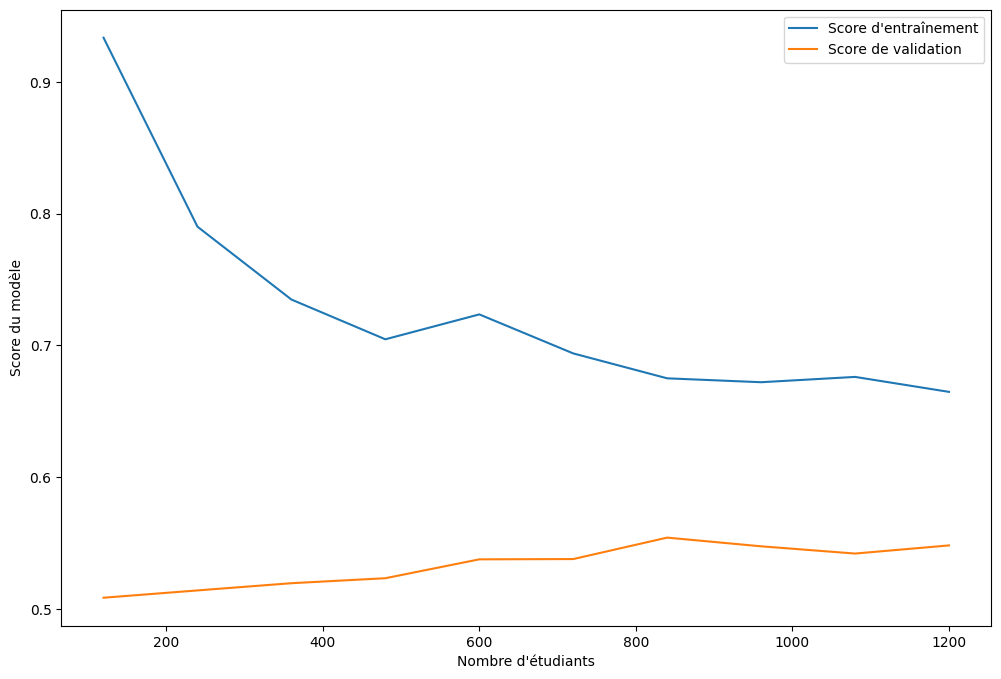

In [43]:
evaluation(model_1)
evaluation(model_2)

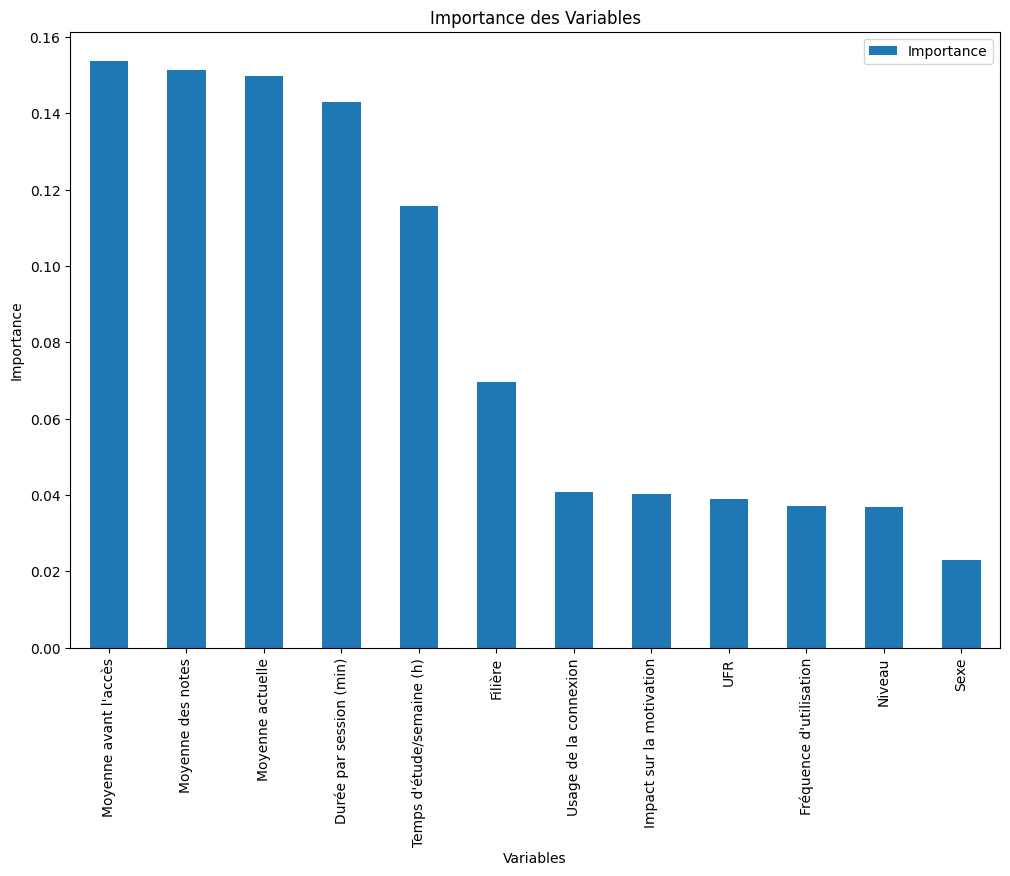

In [44]:
# Créer un DataFrame avec les importances des fonctionnalités
feature_importances_df = pd.DataFrame(model_1.feature_importances_, index=X_train.columns, columns=['Importance'])

# Trier les importances par ordre décroissant
feature_importances_df_sorted = feature_importances_df.sort_values(by='Importance', ascending=False)

# Tracer le graphique en barres
feature_importances_df_sorted.plot.bar(figsize=(12, 8))
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Importance des Variables')
plt.show()

In [45]:
feature_importances_df_sorted

Importance
Moyenne avant l'accès        0.153674
Moyenne des notes            0.151409
Moyenne actuelle             0.149747
Durée par session (min)      0.142869
Temps d'étude/semaine (h)    0.115794
Filière                      0.069508
Usage de la connexion        0.040861
Impact sur la motivation     0.040211
UFR                          0.038976
Fréquence d'utilisation      0.037114
Niveau                       0.036873
Sexe                         0.022963

In [46]:
seuil = 0.070183
variables_selectionnees = feature_importances_df_sorted[feature_importances_df_sorted['Importance'] > seuil].index.to_list()


In [47]:
variables_selectionnees

["Moyenne avant l'accès",
 'Moyenne des notes',
 'Moyenne actuelle',
 'Durée par session (min)',
 "Temps d'étude/semaine (h)"]

In [48]:
X_train = X_train[variables_selectionnees]
X_test = X_test[variables_selectionnees]

In [49]:
X_test.head()

Moyenne avant l'accès  Moyenne des notes  Moyenne actuelle  \
405                8.178546           8.835950         15.596162   
1190               3.921988           9.015889         12.523169   
1132               9.917081           3.815322         12.011035   
731                8.792489          10.876688          4.629248   
1754              13.054716          11.066505          8.733697   

      Durée par session (min)  Temps d'étude/semaine (h)  
405                       186                         22  
1190                       12                          3  
1132                      130                         11  
731                       136                          3  
1754                       82                         16

## Entrainement du modèle

In [50]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [51]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
DecisionTree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))
LinearReg = LinearRegression()
NeuralNetwork = make_pipeline(preprocessor, StandardScaler(), MLPClassifier(random_state=0, max_iter=100))
LogisticReg = LogisticRegression()

In [52]:
dict_of_models = {
    'RandomForest': RandomForest,
    'AdaBoost': AdaBoost,
    'SVM': SVM,
    'KNN': KNN,
}

RandomForest
[[ 91 117]
 [ 78 114]]
              precision    recall  f1-score   support

           0       0.54      0.44      0.48       208
           1       0.49      0.59      0.54       192

    accuracy                           0.51       400
   macro avg       0.52      0.52      0.51       400
weighted avg       0.52      0.51      0.51       400

AdaBoost


c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[ 82 126]
 [ 70 122]]
              precision    recall  f1-score   support

           0       0.54      0.39      0.46       208
           1       0.49      0.64      0.55       192

    accuracy                           0.51       400
   macro avg       0.52      0.51      0.51       400
weighted avg       0.52      0.51      0.50       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R alg

SVM
[[ 59 149]
 [ 46 146]]
              precision    recall  f1-score   support

           0       0.56      0.28      0.38       208
           1       0.49      0.76      0.60       192

    accuracy                           0.51       400
   macro avg       0.53      0.52      0.49       400
weighted avg       0.53      0.51      0.48       400

KNN
[[ 85 123]
 [ 78 114]]
              precision    recall  f1-score   support

           0       0.52      0.41      0.46       208
           1       0.48      0.59      0.53       192

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.50      0.50      0.49       400



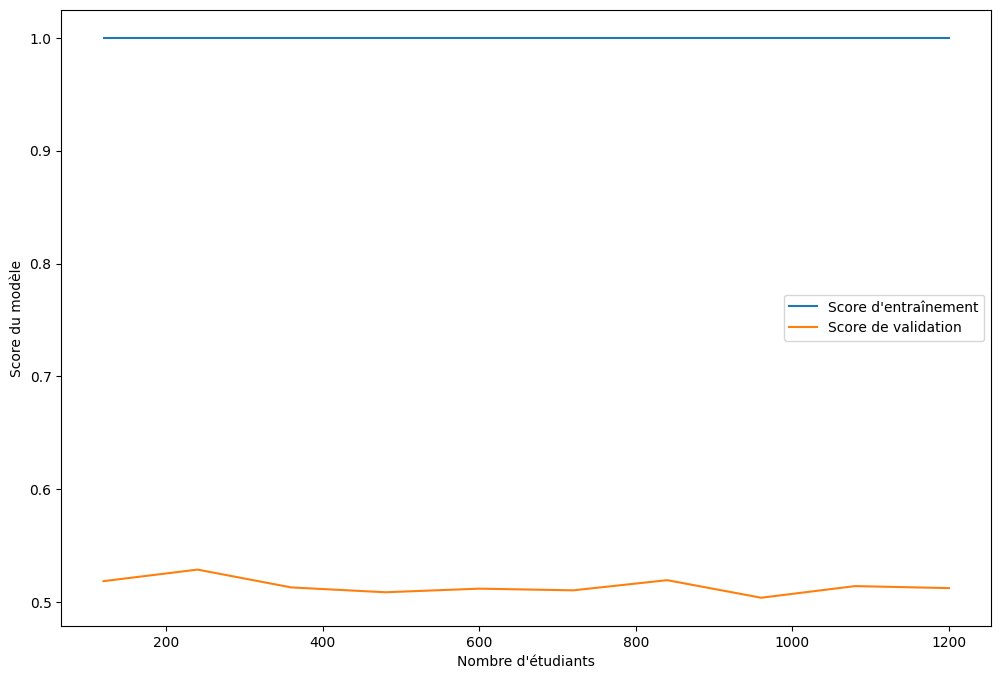

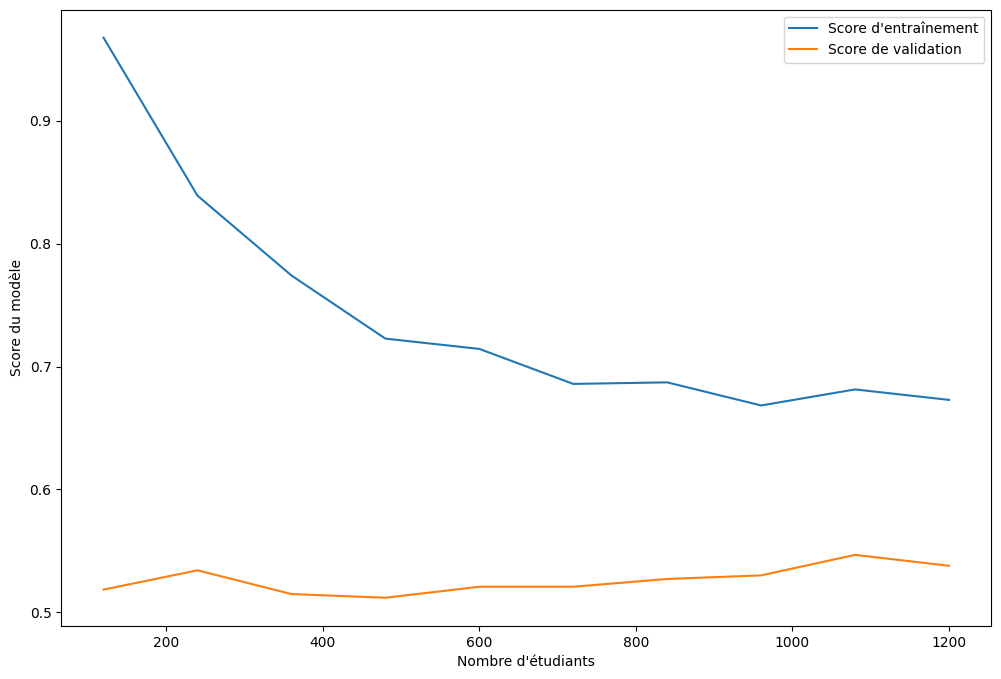

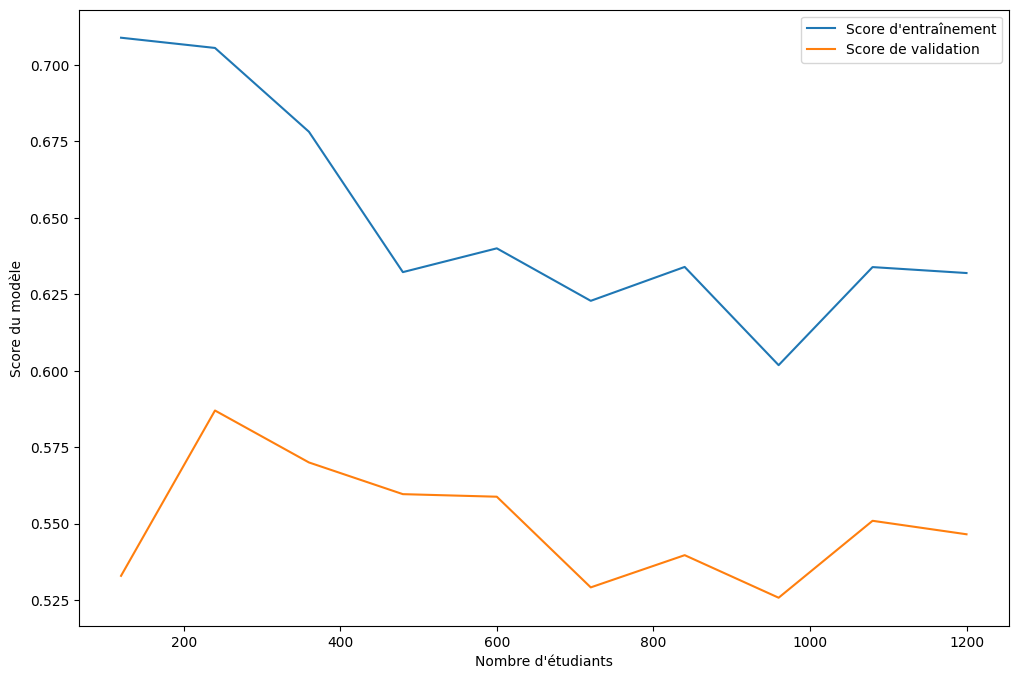

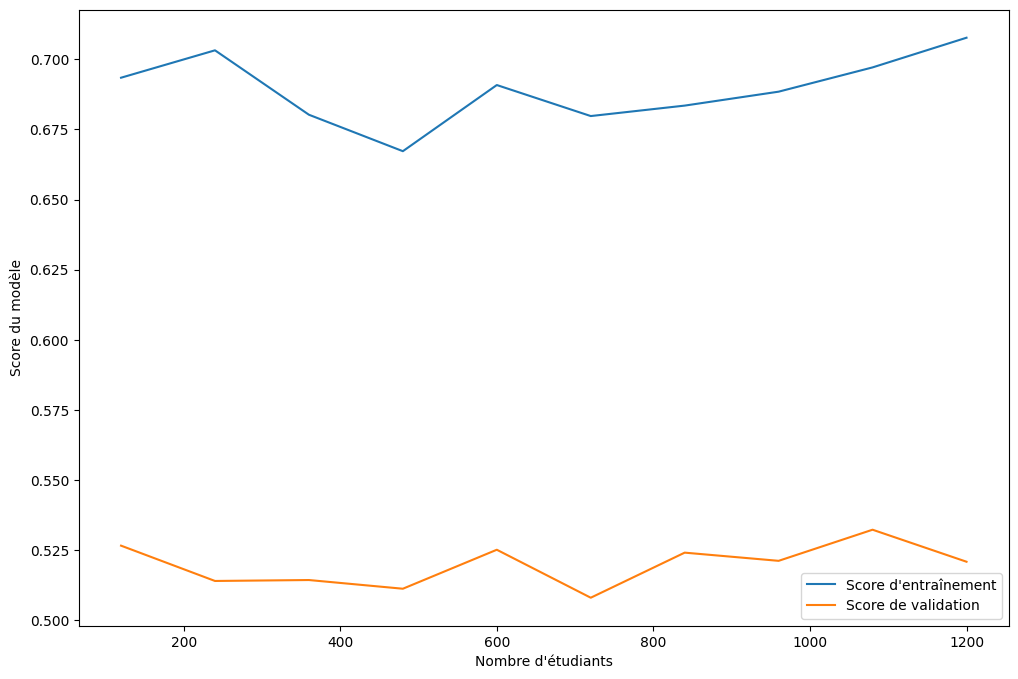

In [53]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [54]:
dict_of_models = {
    'DecisionTree': DecisionTree,
    'NeuralNetwork': NeuralNetwork,
}

DecisionTree
[[105 103]
 [ 87 105]]
              precision    recall  f1-score   support

           0       0.55      0.50      0.53       208
           1       0.50      0.55      0.53       192

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400

NeuralNetwork


c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[[ 76 132]
 [ 65 127]]
              precision    recall  f1-score   support

           0       0.54      0.37      0.44       208
           1       0.49      0.66      0.56       192

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.52      0.51      0.50       400



c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1

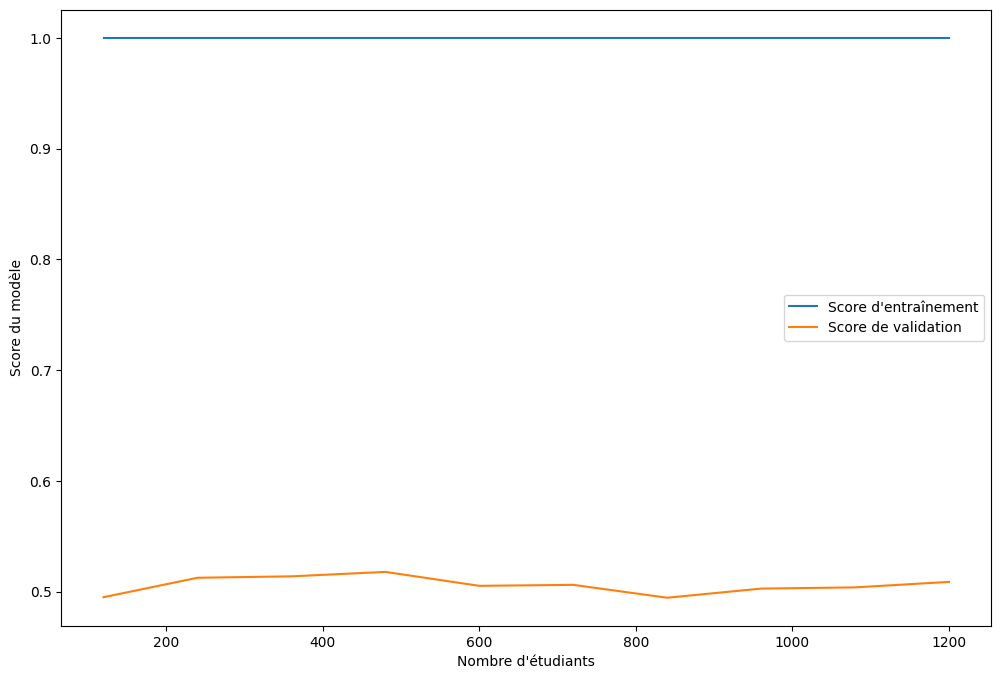

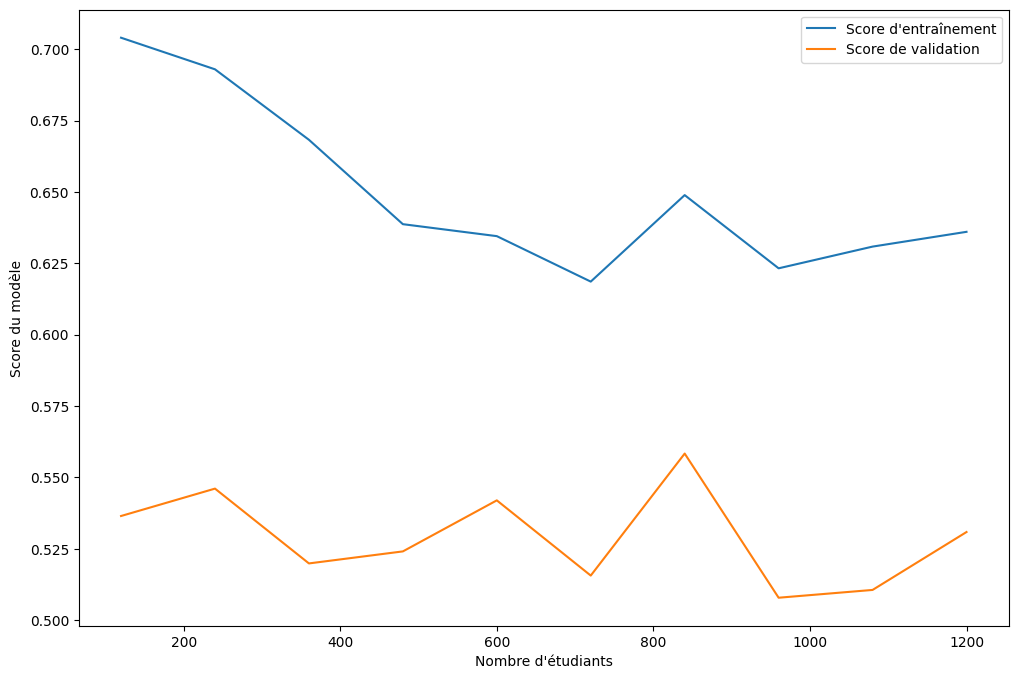

In [55]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

Évaluation de LinearRegression :
RMSE : 0.50
R² : -0.01


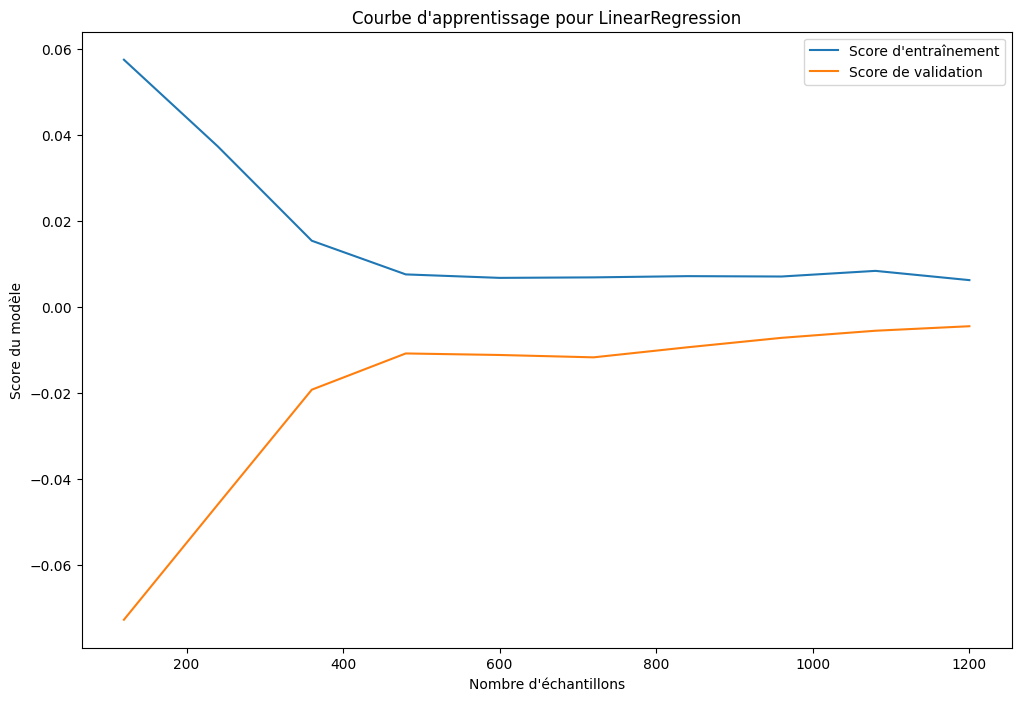


Évaluation de LogisticRegression :
Matrice de confusion :
[[ 79 129]
 [ 67 125]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.54      0.38      0.45       208
           1       0.49      0.65      0.56       192

    accuracy                           0.51       400
   macro avg       0.52      0.52      0.50       400
weighted avg       0.52      0.51      0.50       400



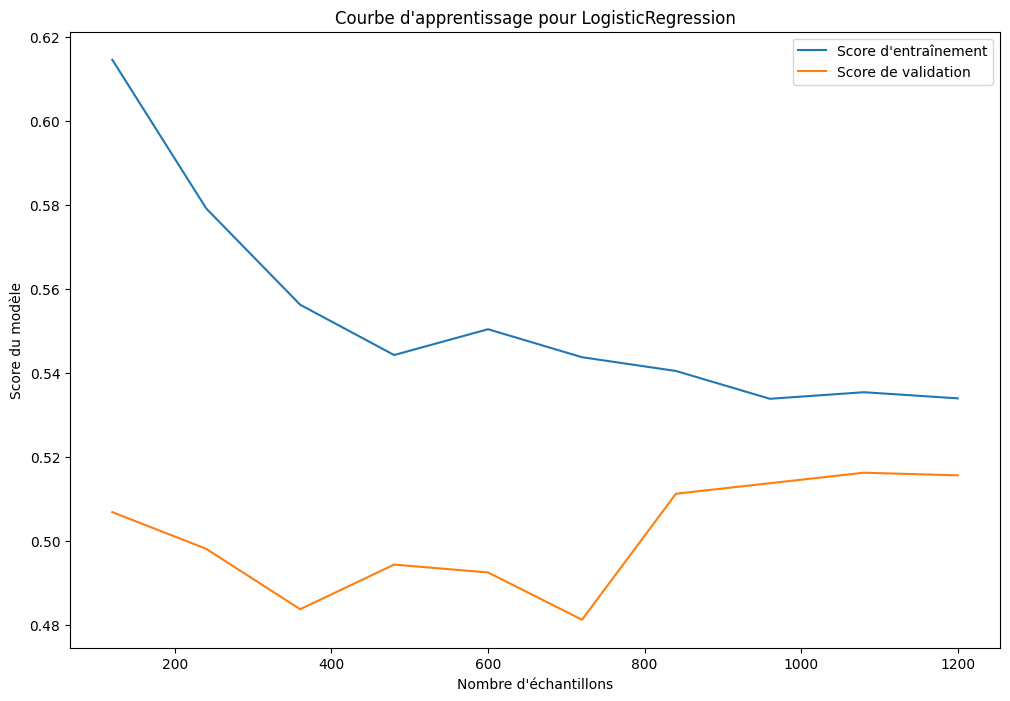

In [56]:
def evaluation_2(model, task_type="classification"):
    """
    Évalue un modèle pour des tâches de classification ou de régression.
    
    :param model: Le modèle à évaluer
    :param task_type: "classification" ou "regression" pour ajuster l'évaluation
    """
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    if task_type == "classification":
        # Évaluation pour les modèles de classification
        print("Matrice de confusion :")
        print(confusion_matrix(y_test, ypred))
        print("\nRapport de classification :")
        print(classification_report(y_test, ypred))
    elif task_type == "regression":
        # Évaluation pour les modèles de régression
        rmse = np.sqrt(mean_squared_error(y_test, ypred))
        r2 = r2_score(y_test, ypred)
        print(f"RMSE : {rmse:.2f}")
        print(f"R² : {r2:.2f}")
    
    # Calcul des courbes d'apprentissage
    N, train_score, val_score = learning_curve(
        model, X_train, y_train, 
        cv=4, scoring="accuracy" if task_type == "classification" else "r2", 
        train_sizes=np.linspace(0.1, 1, 10)
    )
    
    # Affichage des courbes d'apprentissage
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label="Score d'entraînement")
    plt.plot(N, val_score.mean(axis=1), label="Score de validation")
    plt.legend()
    plt.xlabel("Nombre d'échantillons")
    plt.ylabel("Score du modèle")
    plt.title(f"Courbe d'apprentissage pour {type(model).__name__}")
    plt.show()

# Appel des évaluations
LinearReg = LinearRegression()
LogisticReg = LogisticRegression()

# Évaluation pour la régression
print("Évaluation de LinearRegression :")
evaluation_2(LinearReg, task_type="regression")

# Évaluation pour la classification
print("\nÉvaluation de LogisticRegression :")
evaluation_2(LogisticReg, task_type="classification")


# Optimisation

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest


## SVM

In [58]:
# Pipeline pour SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest()),
    ('svc', SVC(random_state=0, probability=True))  # Activation des probabilités
])

# Hyperparamètres pour SVM
param_grid_svm = {
    'selectkbest__k': randint(1, X_train.shape[1]),  # Nombre de caractéristiques
    'svc__C': uniform(0.1, 10),
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__degree': randint(2, 4)  # Si le noyau est 'poly'
}


In [59]:
# Initialiser RandomizedSearchCV
grid1 = RandomizedSearchCV(pipeline_svm, param_grid_svm, scoring='f1', cv=4, n_iter=40)

# Exécuter la recherche aléatoire sur la grille
grid1.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = grid1.predict(X_test)

[[ 23 185]
 [ 11 181]]
              precision    recall  f1-score   support

           0       0.68      0.11      0.19       208
           1       0.49      0.94      0.65       192

    accuracy                           0.51       400
   macro avg       0.59      0.53      0.42       400
weighted avg       0.59      0.51      0.41       400



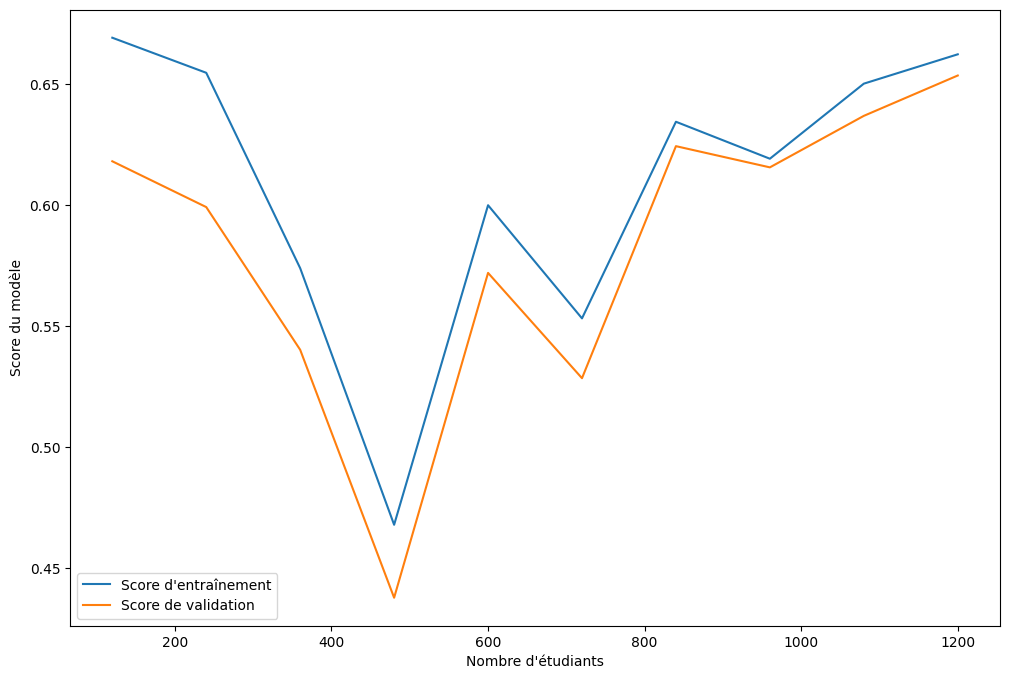

In [60]:
# Évaluer le meilleur modèle
evaluation(grid1.best_estimator_)

## Régression Logistique

In [61]:
# Pipeline pour Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest()),
    ('logreg', LogisticRegression(random_state=0))

    
])

# Hyperparamètres pour Logistic Regression
param_grid_lr = {
    'selectkbest__k': randint(1, X_train.shape[1]),  # Nombre de caractéristiques
    'logreg__C': uniform(0.1, 10),
    'logreg__penalty': ['l2', 'none'],
    'logreg__solver': ['lbfgs', 'saga'],
    'logreg__max_iter': randint(100, 500)
}

In [62]:
# Initialiser RandomizedSearchCV
grid = RandomizedSearchCV(pipeline_lr, param_grid_lr, scoring='f1', cv=4, n_iter=40)

# Exécuter la recherche aléatoire sur la grille
grid.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = grid.predict(X_test)

c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:

Matrice de confusion :
[[ 72 136]
 [ 61 131]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.54      0.35      0.42       208
           1       0.49      0.68      0.57       192

    accuracy                           0.51       400
   macro avg       0.52      0.51      0.50       400
weighted avg       0.52      0.51      0.49       400



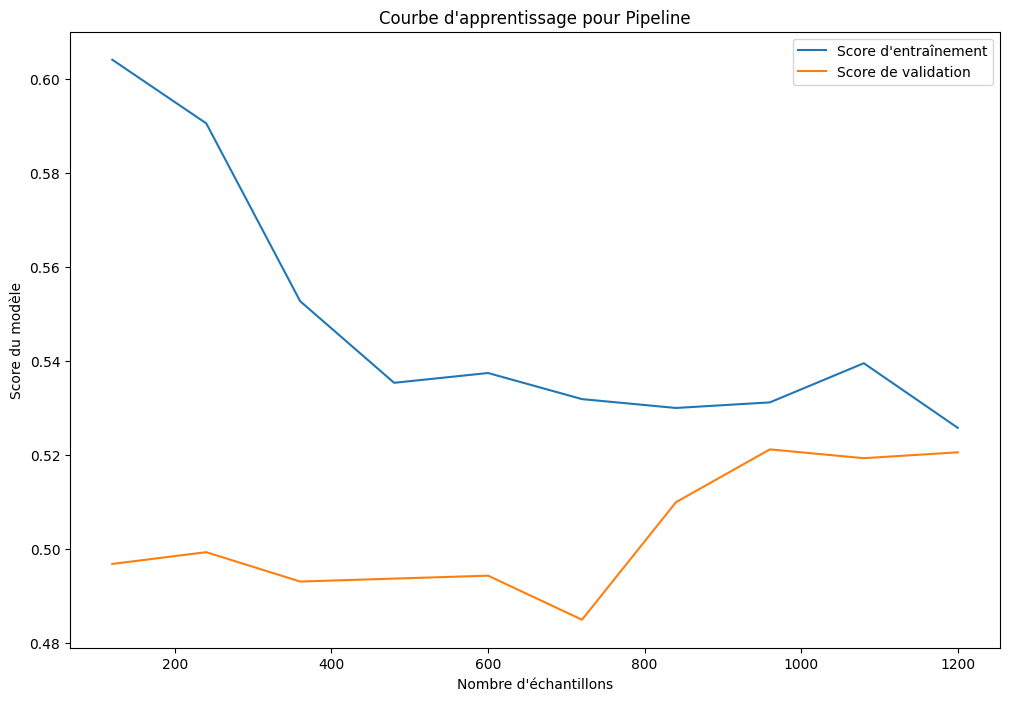

In [63]:
# Évaluer le meilleur modèle
evaluation_2(grid.best_estimator_)

In [64]:
X_train.head()

Moyenne avant l'accès  Moyenne des notes  Moyenne actuelle  \
582               15.819895           8.811177         16.883697   
159               16.664340          17.201576         15.944203   
1827              15.286369          14.047140         15.520994   
318                5.886761           9.073883          4.043069   
708               16.543505           7.008042          5.834745   

      Durée par session (min)  Temps d'étude/semaine (h)  
582                       121                          4  
159                       236                         15  
1827                      180                         12  
318                       242                         17  
708                       102                         12

## Model final

In [65]:
model = grid1.best_estimator_

In [66]:
notes_etudiant = [5.286369,	6.047140,	3.8,	180,	0]

# Utiliser le meilleur modèle pour faire des prédictions sur les données de l'étudiant
prediction_etudiant = model.predict([notes_etudiant])

# Afficher la prédiction
print(prediction_etudiant)

[1]


c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
# Faire des prédictions de probabilité avec le meilleur modèle
probabilites_predites = model.predict_proba([notes_etudiant])

# Convertir les probabilités en pourcentages
pourcentages_predits = (probabilites_predites * 100).round(2)

# Afficher les pourcentages prédits pour chaque classe
print("Pourcentages prédits pour la classe 0 :", pourcentages_predits[0][0])
print("Pourcentages prédits pour la classe 1 :", pourcentages_predits[0][1])


Pourcentages prédits pour la classe 0 : 48.29
Pourcentages prédits pour la classe 1 : 51.71


c:\Users\Ramzy Mr 17\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [68]:
# Sauvegarder le meilleur modèle pour une utilisation ultérieure
# import joblib
# joblib.dump(model, 'model.pkl')